In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

####  public data from the World Bank, and specifically country-by-country indicators related to climate change: https://data.worldbank.org/topic/climate-change

In [2]:
df = pd.read_csv("/content/API_19_DS2_en_csv_v2_5998250.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392


In [3]:
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN
20215,Zimbabwe,ZWE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,109850.000000,110700.000000,111550.000000,112400.000000,113050.000000,...,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,162000.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            2493 non-null   float64
 5   1961            4073 non-null   float64
 6   1962            4107 non-null   float64
 7   1963            4124 non-null   float64
 8   1964            4165 non-null   float64
 9   1965            4197 non-null   float64
 10  1966            4203 non-null   float64
 11  1967            4208 non-null   float64
 12  1968            4219 non-null   float64
 13  1969            4225 non-null   float64
 14  1970            4771 non-null   float64
 15  1971            6112 non-null   float64
 16  1972            6129 non-null   float64
 17  1973            6133 non-null  

In [5]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [6]:
for i in range(4):
  print(df.columns[i], ":", df.iloc[:, i].nunique())

Country Name : 266
Country Code : 266
Indicator Name : 76
Indicator Code : 76


In [7]:
vc = df['Indicator Name'].value_counts()
for value, count in vc.items():
    print(f"{value}: {count}")

Urban population (% of total population): 266
CO2 intensity (kg per kg of oil equivalent energy use): 266
Renewable electricity output (% of total electricity output): 266
Electricity production from renewable sources, excluding hydroelectric (kWh): 266
Electricity production from renewable sources, excluding hydroelectric (% of total): 266
Renewable energy consumption (% of total final energy consumption): 266
Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP): 266
Electric power consumption (kWh per capita): 266
Energy use (kg of oil equivalent per capita): 266
CO2 emissions from gaseous fuel consumption (kt): 266
Urban population: 266
CO2 emissions from gaseous fuel consumption (% of total): 266
CO2 emissions (kg per 2015 US$ of GDP): 266
CO2 emissions (kt): 266
CO2 emissions from liquid fuel consumption (kt): 266
CO2 emissions from liquid fuel consumption (% of total): 266
CO2 emissions (metric tons per capita): 266
CO2 emissions (kg per PPP $ of GDP): 266
Electri

In [8]:
vc = df['Country Name'].value_counts()
for value, count in vc.items():
    print(f"{value}: {count}")

Aruba: 76
Oman: 76
Malawi: 76
Malaysia: 76
North America: 76
Namibia: 76
New Caledonia: 76
Niger: 76
Nigeria: 76
Nicaragua: 76
Netherlands: 76
Norway: 76
Nepal: 76
Nauru: 76
New Zealand: 76
OECD members: 76
Other small states: 76
French Polynesia: 76
Pakistan: 76
Panama: 76
Peru: 76
Philippines: 76
Palau: 76
Papua New Guinea: 76
Poland: 76
Pre-demographic dividend: 76
Puerto Rico: 76
Korea, Dem. People's Rep.: 76
Portugal: 76
Paraguay: 76
West Bank and Gaza: 76
Pacific island small states: 76
Mauritius: 76
Mauritania: 76
Mozambique: 76
Northern Mariana Islands: 76
Least developed countries: UN classification: 76
Low income: 76
Liechtenstein: 76
Sri Lanka: 76
Lower middle income: 76
Low & middle income: 76
Lesotho: 76
Late-demographic dividend: 76
Lithuania: 76
Luxembourg: 76
Latvia: 76
Macao SAR, China: 76
St. Martin (French part): 76
Morocco: 76
Monaco: 76
Moldova: 76
Madagascar: 76
Maldives: 76
Middle East & North Africa: 76
Mexico: 76
Marshall Islands: 76
Middle income: 76
North Mac

In [9]:
def lineplot(df, ind_name,plot_data):

  '''
    df:(DataFrame) DataFrame containing the data
    ind_name: (Str) Indicator Name
    plot_data: (List)  contains title xlabel and ylabel (numeric variable)

  '''
  ind = df[df['Indicator Name'] == ind_name]
  data = ind[ind['Country Name'].isin(['India','Russian Federation', 'Germany', 'United Kingdom', 'United States','China', 'Canada','Australia'])]
  fd1 = data.drop(data.columns[[1,2,3]], axis=1)

  fd1 = fd1.T


  fd1.columns = fd1.iloc[0]
  fd1 = fd1[1:]
  if ind_name == 'Total greenhouse gas emissions (% change from 1990)':
    fd1 = fd1.iloc[32:]
  #fd1.reset_index(drop=True, inplace=True)
  fd1.ffill(inplace=True)
  fd1.bfill(inplace=True)
  #fd.fillna(fd.median(), inplace=True)
  fd1.head(12)

  # Plotting
  plt.figure(figsize=(10, 6))

  for country in fd1.columns:
    plt.plot(fd1.index, fd1[country], label=country)

  plt.title(plot_data[0])
  plt.xlabel(plot_data[1])
  plt.ylabel(plot_data[2])

  plt.xticks(fd1.index[::10])
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
  plt.show()



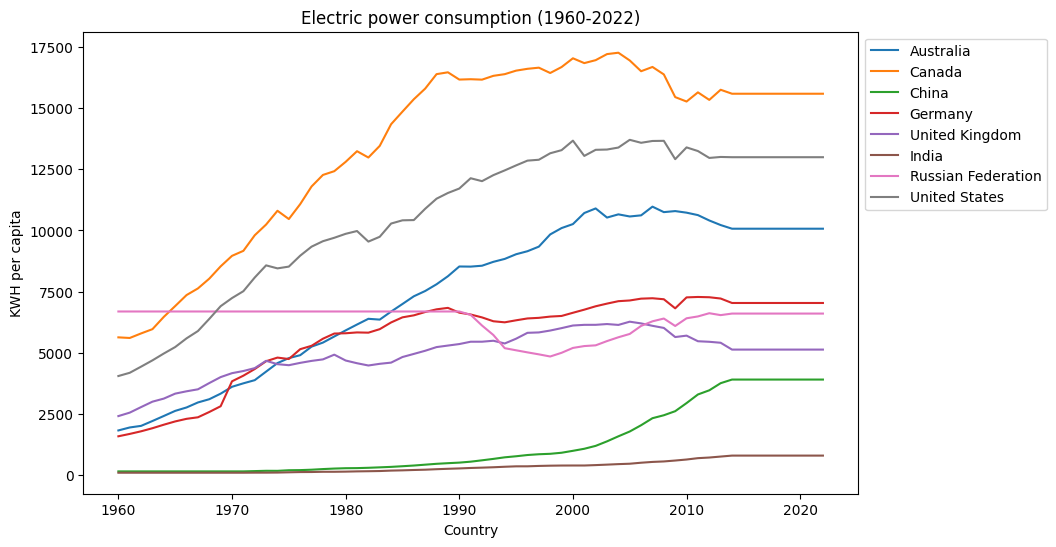

In [10]:
lineplot(df,'Electric power consumption (kWh per capita)', ['Electric power consumption (1960-2022)','Country','KWH per capita'])


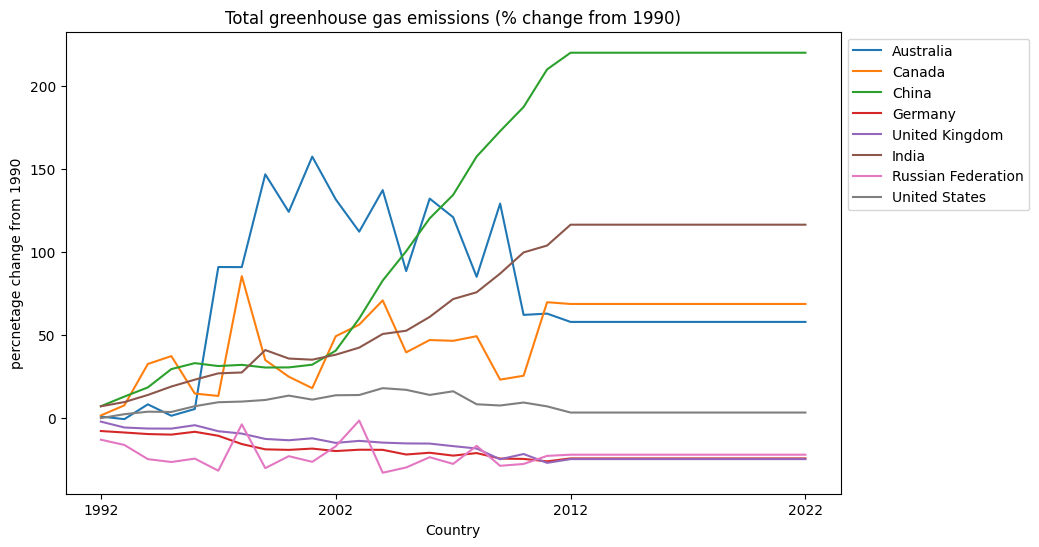

In [11]:
lineplot(df,'Total greenhouse gas emissions (% change from 1990)', ['Total greenhouse gas emissions (% change from 1990)','Country','percnetage change from 1990'])


In [12]:
def barplot(df, ind_name,plot_data):
  '''
    df:(DataFrame) DataFrame containing the data
    ind_name: (Str) Name of the column to be used as the x-axis (categorical variable)
    plot_data: (List)  contains title xlabel and ylabel (numeric variable)
  '''
  ind = df[df['Indicator Name'] == ind_name]
  data = ind[ind['Country Name'].isin(['India','Russian Federation', 'Germany', 'United Kingdom', 'United States','China', 'Canada'])]
  fd2 = data.drop(data.columns[[1,2,3]], axis=1)

  fd2 = fd2.T
  fd2.columns = fd2.iloc[0]
  fd2 = fd2[1:]
  fd2.ffill(inplace=True)
  fd2.bfill(inplace=True)

  fd2.head(12)

  plt.figure(figsize=(12, 8))

  fd2.index = fd2.index.astype(int)
  fd2 = fd2.loc[[1960, 1975, 1990, 2005, 2020, 2022,]]
  fd2 = fd2.T
  fd2.plot(kind="bar",figsize=(15, 8))

  plt.title(plot_data[0])
  plt.xlabel(plot_data[1])
  plt.ylabel(plot_data[2])
  plt.legend()
  plt.grid(False)
  plt.show()

<Figure size 1200x800 with 0 Axes>

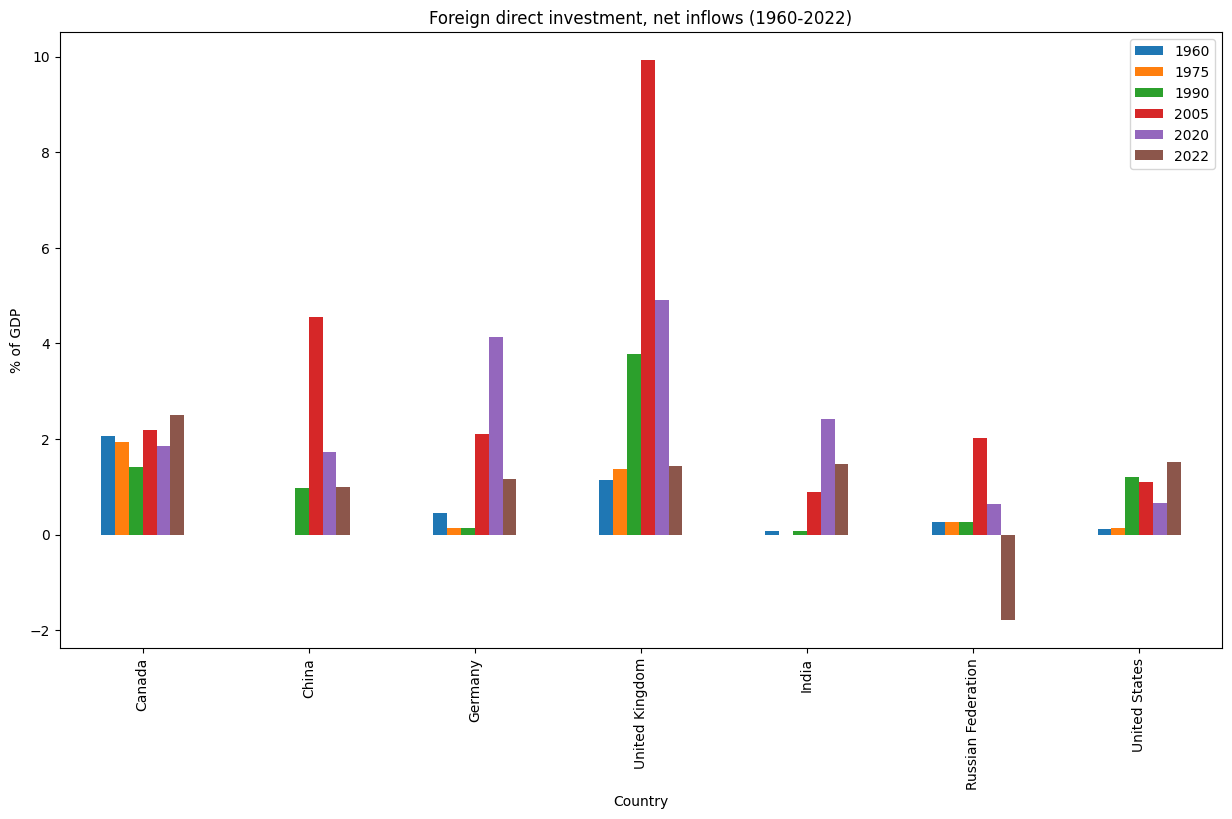

In [13]:
barplot(df,'Foreign direct investment, net inflows (% of GDP)', ['Foreign direct investment, net inflows (1960-2022)','Country', '% of GDP'])


<Figure size 1200x800 with 0 Axes>

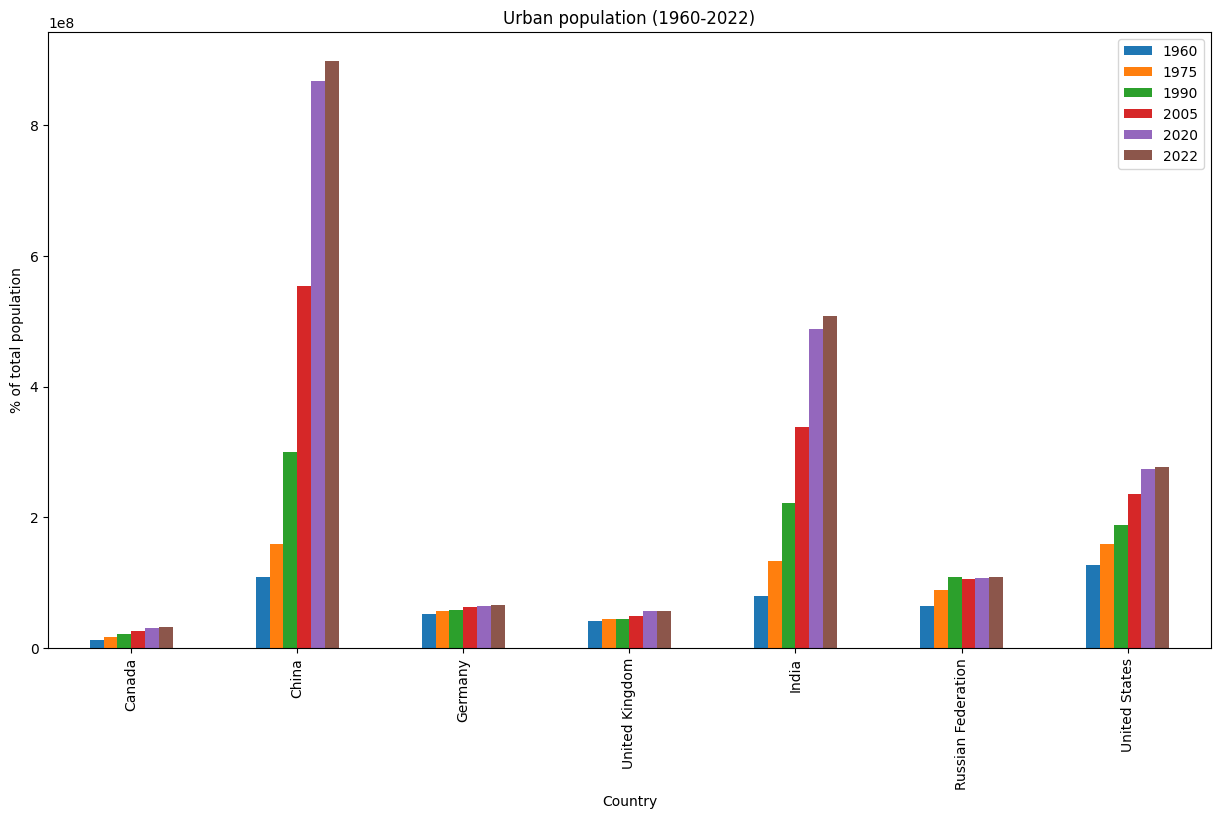

In [14]:
barplot(df,'Urban population', ['Urban population (1960-2022)','Country','% of total population'])


In [15]:
def get_heatmap(df,ind_names,country,cmap):

  '''
    df:(DataFrame) DataFrame containing the data
    ind_names: (List) List of Indicator Names
    country: (Str) country Name

  '''

  country = df[df['Country Name'] == country]
  data = country[country['Indicator Name'].isin(ind_names)]
  fd = data.drop(data.columns[[0,1,3]], axis=1)

  fd = fd.T
  fd.columns = fd.iloc[0]
  fd = fd[1:]
  fd.reset_index(drop=True, inplace=True)
  #print(fd.isnull().sum())
  fd = fd.dropna(thresh=2)
  #print(fd.isnull().sum())

  fd.ffill(inplace=True)
  fd.bfill(inplace=True)
  #fd.fillna(fd.median(), inplace=True)
  fd.head(12)

  f = fd.corr()
  #print(f)
  custom_labels=['Urban population','Annual freshwater withdrawals','Methane emissions','Greenhouse gas emissions','Electric power consumption','Agricultural land']
  ax = sns.heatmap(f, cmap=cmap, annot=True, xticklabels=custom_labels, yticklabels=custom_labels, annot_kws={"size": 12})



In [17]:
Indicators = [
    'Urban population (% of total population)',
    'Methane emissions (% change from 1990)',
    'Agricultural land (sq. km)',
    'Annual freshwater withdrawals, total (% of internal resources)',
    'Total greenhouse gas emissions (% change from 1990)',
    'Electric power consumption (kWh per capita)',
]

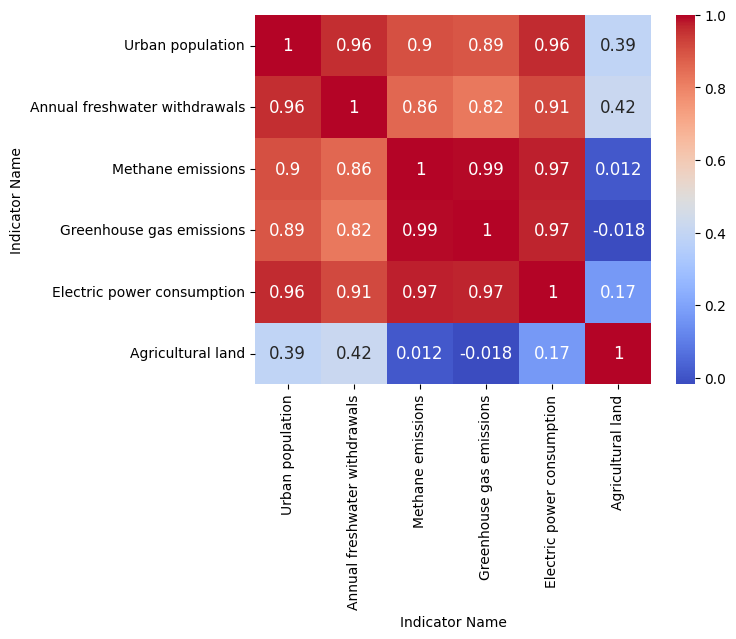

In [18]:
get_heatmap(df,Indicators,'India','coolwarm')

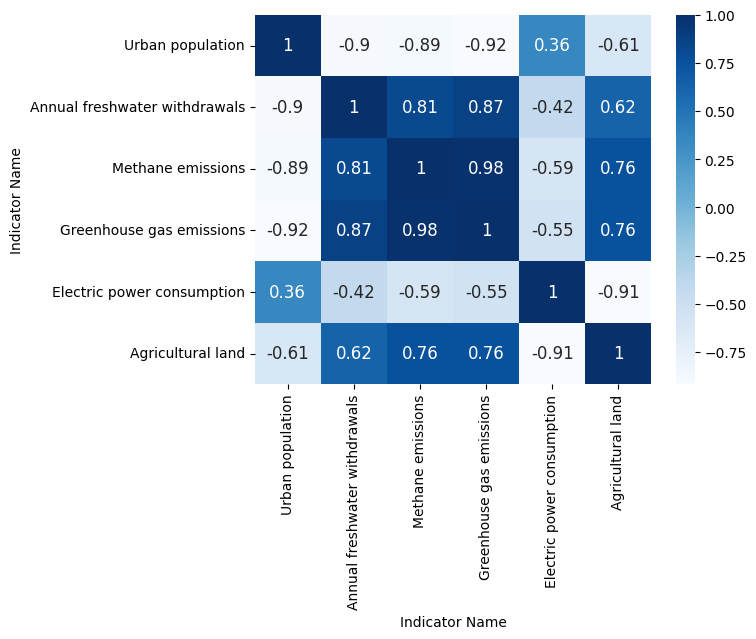

In [19]:
get_heatmap(df,Indicators,'United Kingdom','Blues')

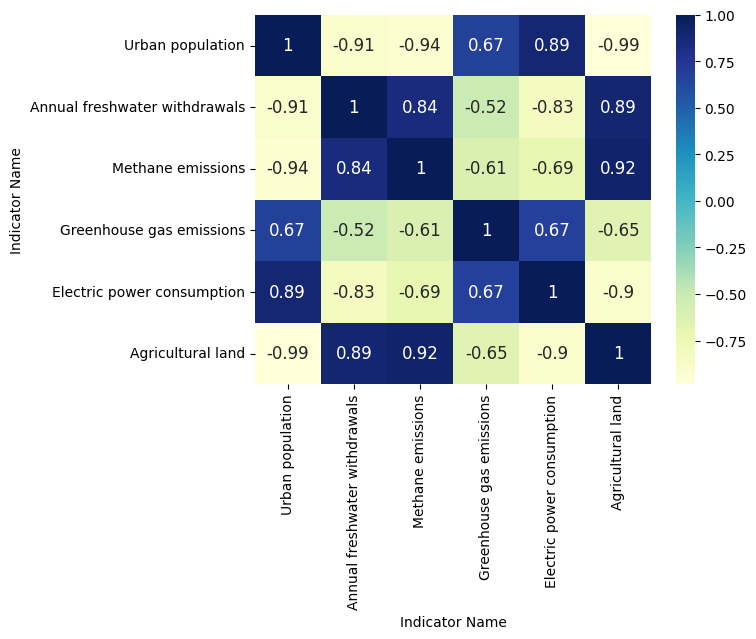

In [20]:
get_heatmap(df,Indicators,'United States','YlGnBu')